---
title: APIs
subtitle: "Application Programming Interfaces"
author:
  - name: Charles Pletcher
    affiliations: Tufts University
    orcid: 0000-0003-2734-5511
    email: charles.pletcher@tufts.edu
license:
  code: MIT
date: 2025-03-31
---

# Application Programming Interfaces

You will hear the term "API" in many different contexts when it comes to computer programming. Already in this class, we have discussed Python's API for the file system.

Often, however, when someone mentions an API, they are referring to a web-based API that is usually accessed over HTTP(S). You might have heard about the kerfuffle when Twitter shut down much of the access to its API, or when Reddit did the same thing a few years earlier. These APIs are servers that provide _interfaces_ (the "I" in "API") to a platform's data.

As you probably noticed while reading @Walker2019, it is not exactly uncommon for references to APIs to become out of date.

Luckily, we can still use the API provided by the [Digital Public Library of America](https://dp.la) for our work for this class.

We'll be working with the Python [Requests](https://docs.python-requests.org/en/latest/) library, which provides its own easy-to-use API for making HTTP requests. In other words, it's APIs all the way down.

## Getting an access token

Generally, APIs will ask that you first obtain a key to use them. Even if APIs offer unlimited requests, it is important for them to require users to supply an API key so that they can track (often anonymized) usage statistics, errors, and so on.

Sometimes, APIs require you to pay, either immediately or after making a certain number of requests. Keys can be used to track usage for payment calculations, too. For an example of this system, see OpenAI's [pricing page](https://openai.com/api/pricing/).

### An API Key for DPLA

For this tutorial, we'll work with the Digital Public Library of America's (DPLA) API. Take a few minutes to read through their [API Basics](https://pro.dp.la/developers/api-basics), then request an API key.

:::{note} Request types

You'll notice that you must submit a `POST` request to receive an API key. `POST` is one of several HTTP verbs. When you enter a URL into a web browser and hit "Enter," you're typically issuing a `GET` request: `GET` requests do not have a request body; they simply ask for the information at the provided URL, perhaps with some query parameters (the `key=value` pairs after a `?` in the URL).

`POST` requests, by contrast, _may_ contain a request body. You've probably submitted `POST` requests without knowing it whenever you sign up for a new service. That's essentially what we're doing with DPLA here, we're just doing it from the command line instead of through an interface that DPLA has built.
:::

The DPLA [documentation](https://pro.dp.la/developers/policies#get-a-key) instructs you to submit a request using `curl`, but we don't have access to `curl` from this notebook. Instead, let's make the request using the Python "Requests" library.

In [1]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [9]:
import requests

my_email = "lauren.langbort@tufts.edu"

requests.post(f"https://api.dp.la/v2/api_key/{my_email}")

<Response [409]>

After running the above code cell, you should receive an email with your API code. It's good practice not to share these codes or include them in version control (i.e., git).

Instead, create an account-specific [secret](https://docs.github.com/en/codespaces/managing-your-codespaces/managing-your-account-specific-secrets-for-github-codespaces) by following the instructions provided by GitHub. 

Let's call the secret `DPLA_API_KEY`. (It's conventional to use all caps for environment variables and secrets.)

Make sure to give your fork of this repository access to the secret, and then restart this codespace. We'll be here when you get back.

## Making your first request

As we saw above, making requests using the `requests` library is pretty straightforward — for a `GET` request, we can just pass a URL to `requests.get()`.

In order for the request to be successful, though, we'll need to include the API key in the `api_key` querystring parameter. And to do that, we'll need to use the `os` library in Python.

In [1]:
import os
import requests

DPLA_API_KEY = os.getenv("DPLA_API_KEY")

Let's use the example provided by the DPLA documentation, querying for the term "weasels".

In [2]:

requests.get(f"https://api.dp.la/v2/items?q=weasels&api_key={DPLA_API_KEY}")


<Response [200]>

`<Response [200]>` means that our request was successful, but it doesn't give us a whole lot of information. This is because we have not read the response body. To do so, let's assign the response — which is the return value of `requests.get()` — to a variable and read it as JSON.

In [3]:
response = requests.get(f"https://api.dp.la/v2/items?q=weasels&api_key={DPLA_API_KEY}")

response.json()

{'count': 244,
 'docs': [{'@context': 'http://dp.la/api/items/context',
   '@id': 'http://dp.la/api/items/58952c8df9811303a16d3599f547d2c2',
   '@type': 'ore:Aggregation',
   'aggregatedCHO': '#sourceResource',
   'dataProvider': {'@id': 'http://dp.la/api/contributor/american-philosophical-society',
    'exactMatch': ['http://www.wikidata.org/entity/Q466089'],
    'name': 'American Philosophical Society'},
   'id': '58952c8df9811303a16d3599f547d2c2',
   'ingestDate': '2025-03-25T15:38:08.858Z',
   'ingestType': 'item',
   'isShownAt': 'https://diglib.amphilsoc.org/islandora/object/weasels',
   'object': 'https://diglib.amphilsoc.org/islandora/object/graphics%3A627/datastream/TN/view/Weasels.jpg',
   'originalRecord': {'stringValue': '<record \nxmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n  <header>\n    <identifier>oai:funnel_cake:padig:APS-weasels</identifier>\n    <datestamp>2024-08-12T19:25:29Z</datestamp>\n    <setSpec>Set:dpl

## Reading responses

As you can see above, the response returns a JSON (JavaScript Object Notation) object with a few top-level keys. If you're thinking, "Hm, this JSON looks an awful lot like a Python dictionary," you're absolutely right. While the semantics of Python dictionaries and JSON _are_ different, in this case, the `requests` library has already coerced the raw JSON to a Python dictionary for us. You can access its values like you would with any Python dict:

In [4]:
parsed_response = response.json()

parsed_response['count']

244

:::{important}
Experiment a bit. How, for example, would you get all of the titles in a list?
:::

## Constructing queries

Naturally, when you're working with an API, you'll want to be able to construct your own queries. Above, we hard-coded the value `weasels` under the querystring parameter `q`. But you can use Python's string interpolation to set any value you want. For example

In [5]:
my_query = "foxes"
my_url = f"https://api.dp.la/v2/items?q={my_query}&api_key={DPLA_API_KEY}"

response = requests.get(my_url)

parsed_response = response.json()
parsed_response

{'count': 1575,
 'docs': [{'@context': 'http://dp.la/api/items/context',
   '@id': 'http://dp.la/api/items/d5728fb0ffcd131d28c33cbefd7437d0',
   '@type': 'ore:Aggregation',
   'aggregatedCHO': '#sourceResource',
   'dataProvider': {'@id': 'http://dp.la/api/contributor/denver-public-library',
    'exactMatch': ['http://www.wikidata.org/entity/Q5259775'],
    'name': 'Denver Public Library'},
   'id': 'd5728fb0ffcd131d28c33cbefd7437d0',
   'ingestDate': '2025-01-29T20:03:33.435Z',
   'ingestType': 'item',
   'isShownAt': 'https://digital.denverlibrary.org/nodes/view/1050323',
   'object': 'https://digital.denverlibrary.org/assets/nodeimg/1050323',
   'originalRecord': {'stringValue': '<record \nxmlns="http://www.openarchives.org/OAI/2.0/" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">\n  <header>\n    <identifier>\n      oai:YOUR_OAI_PREFIX:DPL:oai:digital.denverlibrary.org:1050323\n    </identifier>\n    <datestamp>2025-01-27T21:49:44Z</datestamp>\n  </header>\n  <metadata>\n   

You could even write a function that puts constructs the request URL and returns the parsed response so that you don't have to do these things manually over and over again.

In [6]:
def make_dpla_request(query: str):
    url = f"https://api.dp.la/v2/items?q={query}&api_key={DPLA_API_KEY}"
    response = requests.get(url)

    return response.json()

There's a problem with this code, however. What happens if you try to make a request with a query that contains spaces, such as `"red foxes"`?

Can you find the appropriate workaround using the documentation? https://pro.dp.la/developers/requests

What other features does this API support?

## RESTful APIs

Many APIs, including the DPLA's, are built on RESTful principles. REST stands for **Re**presentational **S**tate **T**ransfer. In terms of web APIs, REST means that a given server will respond with a representation of the data that it has available, and that representation will contain additional information for manipulating the data or requesting further data.

Although it is not, strictly speaking, a requirement of REST APIs, many REST implementations use a predictable URL scheme.

For example, you might find a list of "collections" at the `/collections` endpoint. To request a specific collection, you would append its ID — e.g., for Collection 3, `/collections/3`.

Each collection might contain items, so to get a list of items in Collection 3 you could send a request to `/collections/3/items`. And then to get a specific item in that collection — you guessed it, `/collections/3/items/12`.

DPLA does _not_ implement this kind of schema, and instead relies on facets and other search parameters. But it is worth being aware of such schemes if you want to use other APIs in your work and research.

## Readings

- @Walker2019
- @Matthes2023 [chs. 15–17]

## Homework

Design and test an experiment using the data from a publicly available API, such as the [Digital Public Library of America](https://pro.dp.la/developers) or [Chronicling America](https://chroniclingamerica.loc.gov/about/api/) — you can also use another data source, just run it by me first.

In your report, be sure to discuss your research question, hypothesis, methods, results, and conclusion — in other words, walk the reader through the full scientific process.

These experiments need not be large — think of a small, answerable question that you could tackle in the space of 4 hours of work (i.e., the amount of outside work generally expected for each lab).

2000: 5
2001: 5
2002: 7
2003: 9
2004: 6
2005: 3
2006: 7
2007: 12
2008: 10
2009: 15
2010: 19
2011: 16
2012: 15
2013: 11
2014: 8
2015: 8
2016: 22
2017: 3
2018: 0
2019: 0
2020: 1
2021: 1
2022: 1
2023: 1
2024: 0


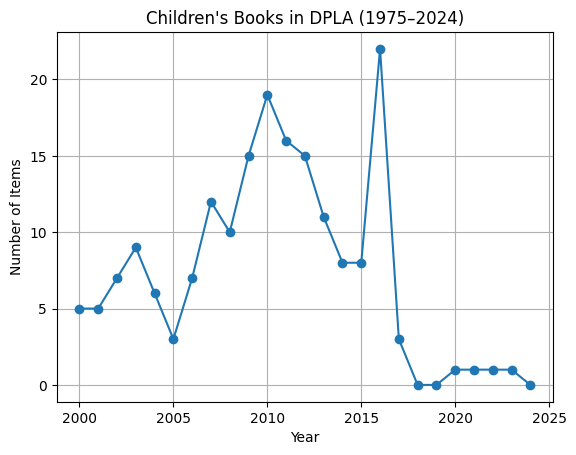

In [8]:
import os
import requests
import matplotlib.pyplot as plt
import time

API_KEY = os.getenv("DPLA_API_KEY")  
BASE_URL = "https://api.dp.la/v2/items"

years = list(range(2000, 2025))
counts = []

for year in years:
    params = {
        "q": "children's books",
        "sourceResource.date.begin": year,
        "sourceResource.date.end": year,
        "api_key": API_KEY,
        "page_size": 1  
    }
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    counts.append(data.get("count", 0))
    print(f"{year}: {counts[-1]}")
    time.sleep(0.2)  

plt.plot(years, counts, marker='o')
plt.title("Children's Books in DPLA (1975–2024)")
plt.xlabel("Year")
plt.ylabel("Number of Items")
plt.grid(True)
plt.show()

research question : how have the amount of childrens books changed from 2000 to 2025 in the Digital Public Library of America archive? 

hypothesis : digitized children's books become more common overtime because there is an increased want to digitize books since people use technology more.

methods : I used the DPLA archive (https://pro.dp.la/developers) and counted the items that contained children's books from the year 2000 to the year 2025. I used the matplotlib.pyplot as plt library to plot the amount of books to visually see it. 

results : the amount of children's books digitized was increasing from 2000 to 2016. But after 2016 there was a drastic drop from 2016 to 2025

conclusion : I think that the amount of childrens books increased from 2000 to 2016, but after 2016 there might be different digitization strategies or there are less childrens books that have been digitized yet that caused the drop. 